In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_circuit_layout
from math import pi
%matplotlib inline
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend_stv = Aer.get_backend('statevector_simulator')
backend_sim = Aer.get_backend('qasm_simulator')
backend_exp = provider.get_backend('ibmqx2')
sh=1024
y_exp=np.array([])
y_sim=np.array([])
x=np.arange(0,(16.5)*pi/(4*3),pi/(4*3))
x_th=np.arange(0,4*np.pi/3,0.01) 
y_th=((np.cos(x_th*3))+1)/2

In [18]:
def BeamS(q,qr,c,cr,f):
    circ=QuantumCircuit(qr,cr)
    for i in range(q-1):
        circ.cx(0,i+1)
    circ.h(0)
    for i in range(q-1):
        circ.cx(0,i+1)
    circ=f+circ
    return circ

In [19]:
def measu(qr,cr,f):
    meas=QuantumCircuit(qr,cr)
    meas.barrier(qr[:])
    meas.measure(qr[:],cr[:])
    qc=f+meas
    return qc

In [20]:
def phase(q,qr,c,cr,ph,f):
    circ=QuantumCircuit(qr,cr)
    for i in range(q):
        circ.u1(ph,i)
    return f+circ

In [21]:
#Create circuit
q=3
c=3
qr=QuantumRegister(q)
cr=ClassicalRegister(c)
MZ=QuantumCircuit(qr,cr)
#initialize state
#vec=np.zeros(2**q)
#vec[(2**q)-1]=1  
#MZ.initialize(vec, [qr[:]])
#BeamSplitter
MZ=BeamS(q,qr,c,cr,MZ)
#phase
MZ=phase(q,qr,c,cr,pi/(2*5),MZ)
#BeamSplitter
MZ=BeamS(q,qr,c,cr,MZ)
#measurements
MZ=measu(qr,cr,MZ)


MZ.draw()

┌───┐          ┌───────────┐          ┌───┐           ░ ┌─┐»
q6_0: |0>──■────■──┤ H ├──■────■──┤ U1(pi/10) ├──■────■──┤ H ├──■────■───░─┤M├»
         ┌─┴─┐  │  └───┘┌─┴─┐  │  ├───────────┤┌─┴─┐  │  └───┘┌─┴─┐  │   ░ └╥┘»
q6_1: |0>┤ X ├──┼───────┤ X ├──┼──┤ U1(pi/10) ├┤ X ├──┼───────┤ X ├──┼───░──╫─»
         └───┘┌─┴─┐     └───┘┌─┴─┐├───────────┤└───┘┌─┴─┐     └───┘┌─┴─┐ ░  ║ »
q6_2: |0>─────┤ X ├──────────┤ X ├┤ U1(pi/10) ├─────┤ X ├──────────┤ X ├─░──╫─»
              └───┘          └───┘└───────────┘     └───┘          └───┘ ░  ║ »
 c6_0: 0 ═══════════════════════════════════════════════════════════════════╩═»
                                                                              »
 c6_1: 0 ═════════════════════════════════════════════════════════════════════»
                                                                              »
 c6_2: 0 ═════════════════════════════════════════════════════════════════════»
                                                                              »
«            
«q6_0: ──────
«      ┌─┐   
«q6_1: ┤M├───
«      └╥┘┌─┐
«q6_2: ─╫─┤M├
«       ║ └╥┘
«c6_0: ═╬══╬═
«       ║  ║ 
«c6_1: ═╩══╬═
«          ║ 
«c6_2: ════╩═
«

In [49]:
def MZI(q,qr,c,cr,ph):
    MZ=QuantumCircuit(qr,cr)
    #initialize state
    #vec=np.zeros(2**q)
    #vec[(2**q)-1]=1  
    #MZ.initialize(vec, [qr[:]])
    #for i in range(q):
    #    MZ.x(i)
    #BeamSplitter
    MZ=BeamS(q,qr,c,cr,MZ)
    #phase
    MZ=phase(q,qr,c,cr,ph,MZ)
    #BeamSplitter
    MZ=BeamS(q,qr,c,cr,MZ)
    #measurements
    #MZ=measu(qr,cr,MZ)
    return MZ

In [52]:
q=3
c=3
qr=QuantumRegister(q)
cr=ClassicalRegister(c)
Mz=MZI(q,qr,c,cr,(pi/(6*3)))
Mz.draw()

┌───┐          ┌───────────┐          ┌───┐          
q22_0: |0>──■────■──┤ H ├──■────■──┤ U1(pi/18) ├──■────■──┤ H ├──■────■──
          ┌─┴─┐  │  └───┘┌─┴─┐  │  ├───────────┤┌─┴─┐  │  └───┘┌─┴─┐  │  
q22_1: |0>┤ X ├──┼───────┤ X ├──┼──┤ U1(pi/18) ├┤ X ├──┼───────┤ X ├──┼──
          └───┘┌─┴─┐     └───┘┌─┴─┐├───────────┤└───┘┌─┴─┐     └───┘┌─┴─┐
q22_2: |0>─────┤ X ├──────────┤ X ├┤ U1(pi/18) ├─────┤ X ├──────────┤ X ├
               └───┘          └───┘└───────────┘     └───┘          └───┘
 c22_0: 0 ═══════════════════════════════════════════════════════════════
                                                                         
 c22_1: 0 ═══════════════════════════════════════════════════════════════
                                                                         
 c22_2: 0 ═══════════════════════════════════════════════════════════════

In [53]:
job=execute(Mz,backend_stv)
result=job.result()
outputstate=result.get_statevector(Mz,decimals=3)
print(outputstate)

[0.933+0.25j 0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j
 0.   +0.j   0.067-0.25j]


In [102]:
#simulating every circuit
circuits=[]
for i in range(len(x)):
    q=3
    c=3
    qr=QuantumRegister(q)
    cr=ClassicalRegister(c)
    MZ=MZI(q,qr,c,cr,x[i])
    circuits.append(MZ)
    
job_sim=execute(circuits,backend=backend_sim, shots=sh)
result_sim=job_sim.result()

y_sim=np.array([])
    
for i in range(len(x)):
    counts_sim=result_sim.get_counts(circuits[i])
    try:
        counts_sim['000']
    except KeyError:
         y_sim=np.append(y_sim,[0])
    else:
        y_sim=np.append(y_sim,[counts_sim['000']/sh])
        
y_sim
    


array([0.26171875, 0.25097656, 0.23828125, 0.25097656, 0.24609375,
       0.26757812, 0.2421875 , 0.25585938, 0.26367188, 0.26855469,
       0.23535156, 0.25488281, 0.25097656, 0.21386719, 0.22851562,
       0.23828125, 0.24707031])

In [103]:
#EXP every circuit
circuits_tp=[]
for i in range(17):
    circuits_tp.append( transpile(circuits[i], backend=backend_exp, optimization_level=3, initial_layout=[2,0,1,3,4]))

print('Depth:', circuits_tp[15].depth())
    

Depth: 10


In [104]:
job_exp= execute(circuits_tp, backend=backend_exp)
job_exp.job_id()

'5e8f99ae45d8960011a30a30'

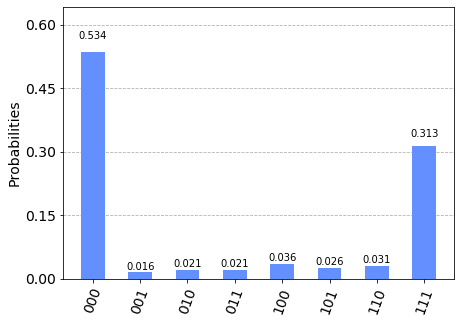

In [107]:
job_exp = backend_exp.retrieve_job('5e8f99ae45d8960011a30a30') # cascading CNOTS
result_exp=job_exp.result()
counts_exp=result_exp.get_counts(5)
plot_histogram(counts)

In [108]:
#job_exp = backend_exp.retrieve_job('5e87a5a9a2cbba0012b1f6a7') #No first point
#job_exp = backend_exp.retrieve_job('5e87af576b9a6c0018be7168')
job_exp = backend_exp.retrieve_job('5e8f99ae45d8960011a30a30') # cascading CNOTS
result_exp=job_exp.result()
y_exp=np.array([])

for i in range(len(x)):
    counts_exp=result_exp.get_counts(i)
    try:
        counts_exp['000']
    except KeyError:
         y_exp=np.append(y_exp,[0])
    else:
        y_exp=np.append(y_exp,[counts_exp['000']/sh])
        
y_exp

array([0.27148438, 0.28808594, 0.26855469, 0.24804688, 0.23925781,
       0.19824219, 0.20117188, 0.24023438, 0.25097656, 0.26269531,
       0.28320312, 0.22851562, 0.25976562, 0.26269531, 0.28222656,
       0.22753906, 0.24023438])

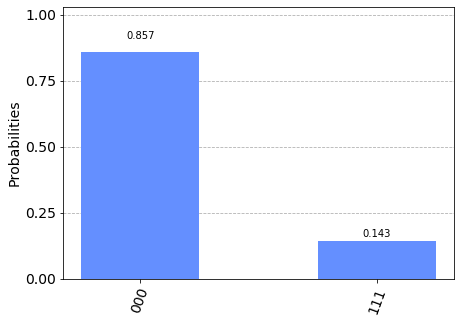

In [71]:
#Sim (Pi/4)
MZ=MZI(q,qr,c,cr,x[1])
job_sim = execute(MZ, backend_sim, shots=sh)
result_sim=job_sim.result()
counts_sim=result_sim.get_counts(MZ)
plot_histogram(counts_sim)

Depth: 12


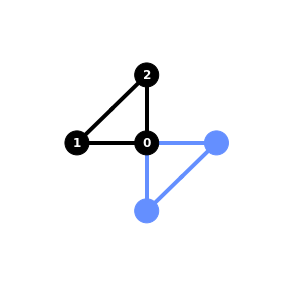

In [72]:
#exp (Pi/4)
MZ_tp = transpile(MZ, backend=backend_exp, optimization_level=3, initial_layout=[2,0,1,3,4])
print('Depth:', MZ_tp.depth())
plot_circuit_layout(MZ_tp, backend_exp)

In [73]:
#exp (Pi/4)
#job_exp= execute(MZ_tp, backend=backend_exp)
#job_exp.job_id()

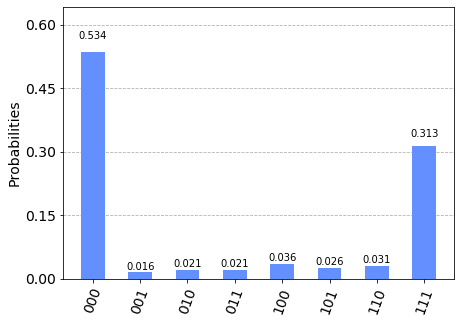

In [74]:
#exp (Pi/4)
job_exp = backend_exp.retrieve_job('5e6a5adce987fe00114c4de5')
result_exp=job_exp.result()
counts=result_exp.get_counts()
plot_histogram(counts)

In [75]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [76]:
cal_circuits,state_labels=complete_meas_cal(qr=qr, circlabel='measurement_calibration')
cal_circuits[7].draw()

┌───┐ ░ ┌─┐      
q896_0: |0>┤ X ├─░─┤M├──────
           ├───┤ ░ └╥┘┌─┐   
q896_1: |0>┤ X ├─░──╫─┤M├───
           ├───┤ ░  ║ └╥┘┌─┐
q896_2: |0>┤ X ├─░──╫──╫─┤M├
           └───┘ ░  ║  ║ └╥┘
  c94_0: 0 ═════════╩══╬══╬═
                       ║  ║ 
  c94_1: 0 ════════════╩══╬═
                          ║ 
  c94_2: 0 ═══════════════╩═

In [77]:
#cal_job=execute(cal_circuits, backend=backend_exp, shots=8192,optimization_level=0)
#cal_job.job_id()

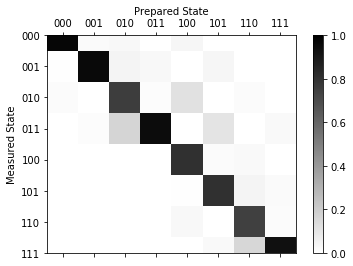

In [78]:
cal_job = backend_exp.retrieve_job('5e6a5b0dd00f3c00112df76a')
cal_results=cal_job.result()
meas_fitter=CompleteMeasFitter(cal_results,state_labels)
meas_fitter.plot_calibration()

In [79]:
meas_filter=meas_fitter.filter

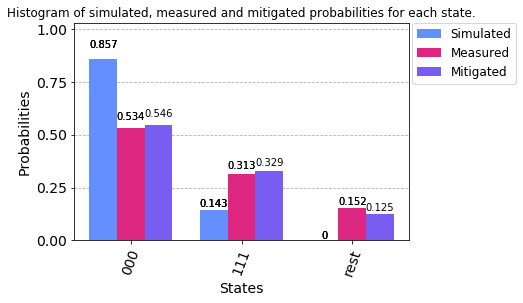

In [80]:
#mitigated exp Pi/4
job_exp = backend_exp.retrieve_job('5e6a5adce987fe00114c4de5')
result_exp=job_exp.result()
mitigated_result=meas_filter.apply(result_exp)
counts=result_exp.get_counts()
mitigated_counts=mitigated_result.get_counts()

fig, ax=plt.subplots()
ax.set_xlabel('States', fontsize=14)
fig=plot_histogram([counts_sim,counts,mitigated_counts],legend=['Simulated','Measured','Mitigated'], number_to_keep=2, title='Histogram of simulated, measured and mitigated probabilities for each state.', ax=ax)
#fig_hist=plot_histogram([counts_sim,counts,mitigated_counts],legend=['Simulated','Real','Mitigated'])
fig

In [85]:
y_sim

array([1.        , 0.85449219, 0.51171875, 0.15820312, 0.        ,
       0.14941406, 0.48925781, 0.83691406, 1.        , 0.85449219,
       0.50097656, 0.17773438, 0.        , 0.15527344, 0.48242188,
       0.83496094, 1.        , 0.85742188])

In [82]:
x

array([0.        , 0.26179939, 0.52359878, 0.78539816, 1.04719755,
       1.30899694, 1.57079633, 1.83259571, 2.0943951 , 2.35619449,
       2.61799388, 2.87979327, 3.14159265, 3.40339204, 3.66519143,
       3.92699082, 4.1887902 ])

In [83]:
y_exp

array([0.98535156, 0.57324219, 0.23242188, 0.05078125, 0.08984375,
       0.32519531, 0.63671875, 0.82226562, 0.78808594, 0.56542969,
       0.24804688, 0.078125  , 0.09472656, 0.32617188, 0.65332031,
       0.81152344, 0.79589844, 0.53417969])

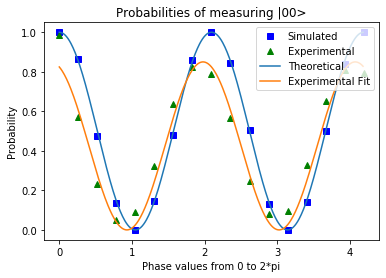

In [88]:
y_fit = 0.85*(np.cos((x_th*3)+(pi/9))+1)/2
x=np.arange(0,(16.5)*pi/(4*3),pi/(4*3))
plt.plot(x,y_sim,'bs',x,y_exp,'g^',x_th,y_th,x_th,y_fit)
plt.xlabel('Phase values from 0 to 2*pi') 
plt.ylabel('Probability')
plt.title('Probabilities of measuring |00>')
plt.legend(['Simulated', 'Experimental','Theoretical','Experimental Fit'],loc=1)     
plt.show()

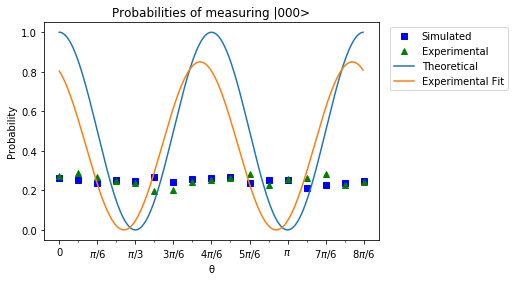

In [109]:
fig, ax = plt.subplots()
x_fit=np.arange(0,4*np.pi/6,0.01) 
y_fit = 0.85*(np.cos(3*((x_th)+(5*pi/100)))+1)/2
ax.plot(x,y_sim,'bs',x,y_exp,'g^',x_th,y_th,x_th,y_fit)
plt.xlabel('θ') 
plt.ylabel('Probability')
plt.title('Probabilities of measuring |000>')
lg=plt.legend(['Simulated', 'Experimental','Theoretical','Experimental Fit'],loc=1, bbox_to_anchor=(1.4,1))
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))

def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(6 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/6$"
    elif N == 2:
        return r"$\pi/3$"
    elif N == 4:
        return r"$4\pi/6$"
    elif N== 6:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/6$".format(N)
    else:
        return r"${0}\pi/6$".format(N // 1)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.show()
#fig.savefig('MZ_3qubit_graph.pdf',bbox_extra_artists=(lg,), bbox_inches='tight')

In [ ]:
MZ_tp.draw()